# Advection PDE: Postprocessing DeepONet

In [1]:
### Importing Libraries

import sys
print(sys.version)
import os
import time


### Defining WORKSPACE_PATH

# WORKSPACE_PATH = os.environ['WORKSPACE_PATH']
WORKSPACE_PATH = os.path.join(os.getcwd(), '../../../../../../')
ROMNet_fld     = os.path.join(WORKSPACE_PATH, 'ROMNet/romnet/')


### Importing External Libraries

import numpy                             as np
import pandas                            as pd
from   numpy                         import diff
import                           cantera as ct

### Importing Matplotlib and Its Style

import matplotlib.pyplot                 as plt

#plt.style.use(os.path.join(WORKSPACE_PATH, 'ROMNet/romnet/extra/postprocessing/presentation.mplstyle'))
#plt.style.use(os.path.join(WORKSPACE_PATH, 'ROMNet/romnet/extra/postprocessing/zoomed.mplstyle'))
plt.style.use(os.path.join(WORKSPACE_PATH, 'ROMNet/romnet/extra/postprocessing/paper_1column.mplstyle'))
#plt.style.use(os.path.join(WORKSPACE_PATH, 'ROMNet/romnet/extra/postprocessing/paper_2columns.mplstyle'))


from scipy.integrate import solve_ivp
import pyDOE
from PCAfold         import PCA          as PCAA


import romnet                            as rmnt


# from IPython.core.display import display, HTML
# display(HTML("<style>.container { width:80% !important; }</style>"))

3.9.12 (main, Mar 26 2022, 15:51:13) 
[Clang 12.0.0 (clang-1200.0.32.29)]


Missing colon in file PosixPath('/Users/sventur/.matplotlib/stylelib/paper_2columns.mplstyle'), line 1 ('f#### MATPLOTLIBRC FORMAT')


In [2]:
DataDir          = os.path.join(WORKSPACE_PATH, 'ROMNet/Data/Advection_10Cases/')

path_to_run_fld  = os.path.join(WORKSPACE_PATH, 'ROMNet/Advection_10Cases/DeepONet/Run_2/')

FigDir           = None #os.path.join(WORKSPACE_PATH, '../Desktop/Paper_Figures_DeepONet_TEMP/')


# DataType         = 'train'
# CasesVec         = range(0,500,100)
DataType         = 'test'
CasesVec         = range(1) #[1,0,2]



NSamples         = 1

FixedMinVal      = 1.e-14 

PCA_NAME         = 'All'

scale            = 'lin'
MinVal           = 1.e-40

 
ColorVec         = ['#190707', '#dd3232', '#0065a9', '#348a00','#985396','#f68b69']
LineVec          = ['-',':','--','.-']*10

In [3]:
n_training  = 10
n_test      = 10  

xtN         = [256, 100]
xtMinVals   = [0., 0.]
xtMaxVals   = [2., 1.]

MuMinMax    = [0.05, 1.] 

## Loading ROMNet's Input Data File

In [4]:
print("\n[ROMNet]: Reading Input File from: ", path_to_run_fld)
sys.path.insert(0, path_to_run_fld)

print("\n[ROMNet]: Keep Loading Modules and Functions...")
from ROMNet_Input import inputdata

print("\n[ROMNet]: Initializing Input ...")
InputData               = inputdata(WORKSPACE_PATH)


InputData.InputFilePath = path_to_run_fld+'/ROMNet_Input.py'
InputData.train_int_flg = 0
InputData.path_to_run_fld  = path_to_run_fld


[ROMNet]: Reading Input File from:  /Users/sventur/WORKSPACE/ROMNet/romnet/scripts/postprocessing/Advection/DeepONet/../../../../../../ROMNet/Advection_10Cases/DeepONet/Run_2/

[ROMNet]: Keep Loading Modules and Functions...

[ROMNet]: Initializing Input ...


## Loading Tensorflow's Model for the Network 

In [5]:
surrogate_type = InputData.surrogate_type
if (surrogate_type == 'FNN-SourceTerms'):
    surrogate_type = 'FNN'

Net   = getattr(rmnt.architecture, surrogate_type)

model = rmnt.model.Model_TF(InputData)

if (InputData.phys_system is not None):
    System = getattr(rmnt.pinn.system, InputData.phys_system)
    system = System(InputData)
    
model.build(InputData, None, Net, system)#, loadfile_no='000027')

NN    = model.net


[ROMNet - model_tf.py    ]:   Initializing the ML Model

[ROMNet - model_tf.py    ]:   Building the ML Model

[ROMNet - deeponet.py               ]:   Constructing Deep Operator Network: 
[ROMNet - system_of_components.py   ]:     Mapping Branch-to-Trunk (i.e., self.branch_to_trunk Object):  one_to_one
[ROMNet - system_of_components.py   ]:     Constructing System of Components: DeepONet
component_name =  Branch_1
[ROMNet - component.py              ]:       Constructing Component: Branch_1
[ROMNet - sub_component.py          ]:         Constructed Sub-Component: Main with Layers:       ListWrapper([<keras.layers.core.dense.Dense object at 0x1651c3190>, <keras.layers.core.dense.Dense object at 0x165237160>, <keras.layers.core.dense.Dense object at 0x165237a60>, <keras.layers.core.dense.Dense object at 0x165231e80>, <keras.layers.core.dense.Dense object at 0x165231fa0>])
component_name =  Trunk_1
[ROMNet - component.py              ]:       Constructing Component: Trunk_1
[ROMNet - sub

In [15]:
DF_

,u1,u2,u3,u4,u5,u6,u7,u8,u9,u10,...,u249,u250,u251,u252,u253,u254,u255,u256,t,x
0,0.002498,26.343211,39.812525,20.016787,0.227697,0.040926,0.003792,0.002283,0.001612,0.000004,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.002498,26.343211,39.812525,20.016787,0.227697,0.040926,0.003792,0.002283,0.001612,0.000004,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007843
2,0.002498,26.343211,39.812525,20.016787,0.227697,0.040926,0.003792,0.002283,0.001612,0.000004,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.015686
3,0.002498,26.343211,39.812525,20.016787,0.227697,0.040926,0.003792,0.002283,0.001612,0.000004,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.023529
4,0.002498,26.343211,39.812525,20.016787,0.227697,0.040926,0.003792,0.002283,0.001612,0.000004,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.031373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25595,0.002498,26.343211,39.812525,20.016787,0.227697,0.040926,0.003792,0.002283,0.001612,0.000004,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.968627
25596,0.002498,26.343211,39.812525,20.016787,0.227697,0.040926,0.003792,0.002283,0.001612,0.000004,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.976471
25597,0.002498,26.343211,39.812525,20.016787,0.227697,0.040926,0.003792,0.002283,0.001612,0.000004,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.984314
25598,0.002498,26.343211,39.812525,20.016787,0.227697,0.040926,0.003792,0.002283,0.001612,0.000004,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.992157


## Evaluating DeepONet on Test Data

### Loading Variables Info

In [14]:
Vars      = ['s']

Vars0     = ['u'+str(i+1) for i in range(InputData.Nx)]

InputVars = Vars0+['t']+['x']

## Analytical Solution

In [7]:
def fOrig(t, x):
        
    x_ = x - Params[0] * t
    
    y  = 1. / np.sqrt(Params[2]*np.pi) * np.exp( - (x_-Params[1])**2 / Params[2] )
    
    return y


Params = np.array([1.0, 1.0, 0.0002], dtype=np.float64)

### Loading and Plotting Test/Training Data

In [12]:
xnames   = ['x'+str(i+1) for i in range(xtN[0])]
unames   = ['u'+str(i+1) for i in range(xtN[0])]

FileName = DataDir + '/Orig/'+DataType+'/ext/x0.csv'
x0Vec    = pd.read_csv(FileName, header=None).to_numpy()[:,0]

FileName = DataDir + '/Orig/test/ext/Mu.csv'
muVec    = pd.read_csv(FileName, header=None).to_numpy()[:,0]

P        = xtN[0] * xtN[1]

jTest  = 0
for i_case in CasesVec:

    
    Params[1]    = muVec[i_case]
    u            = fOrig(0, x0Vec)

    DF_          = pd.DataFrame( np.tile(u[np.newaxis,...], (P,1)), columns=unames)
    
    xVec_        = np.linspace(xtMinVals[0], xtMaxVals[0], xtN[0])
    tVec_        = np.linspace(xtMinVals[1], xtMaxVals[1], xtN[1])
    xVec__, tVec__ = np.meshgrid(xVec_, tVec_)
    xVec         = xVec__.reshape(-1)
    tVec         = tVec__.reshape(-1)

    DF_['t']     = tVec
    DF_['x']     = xVec
    
    s_Data       = fOrig(tVec, xVec).reshape(xtN[1],xtN[0])
    
    
    
    
    s_Pred       = model.predict(DF_[InputVars]).reshape(xtN[1],xtN[0])
    

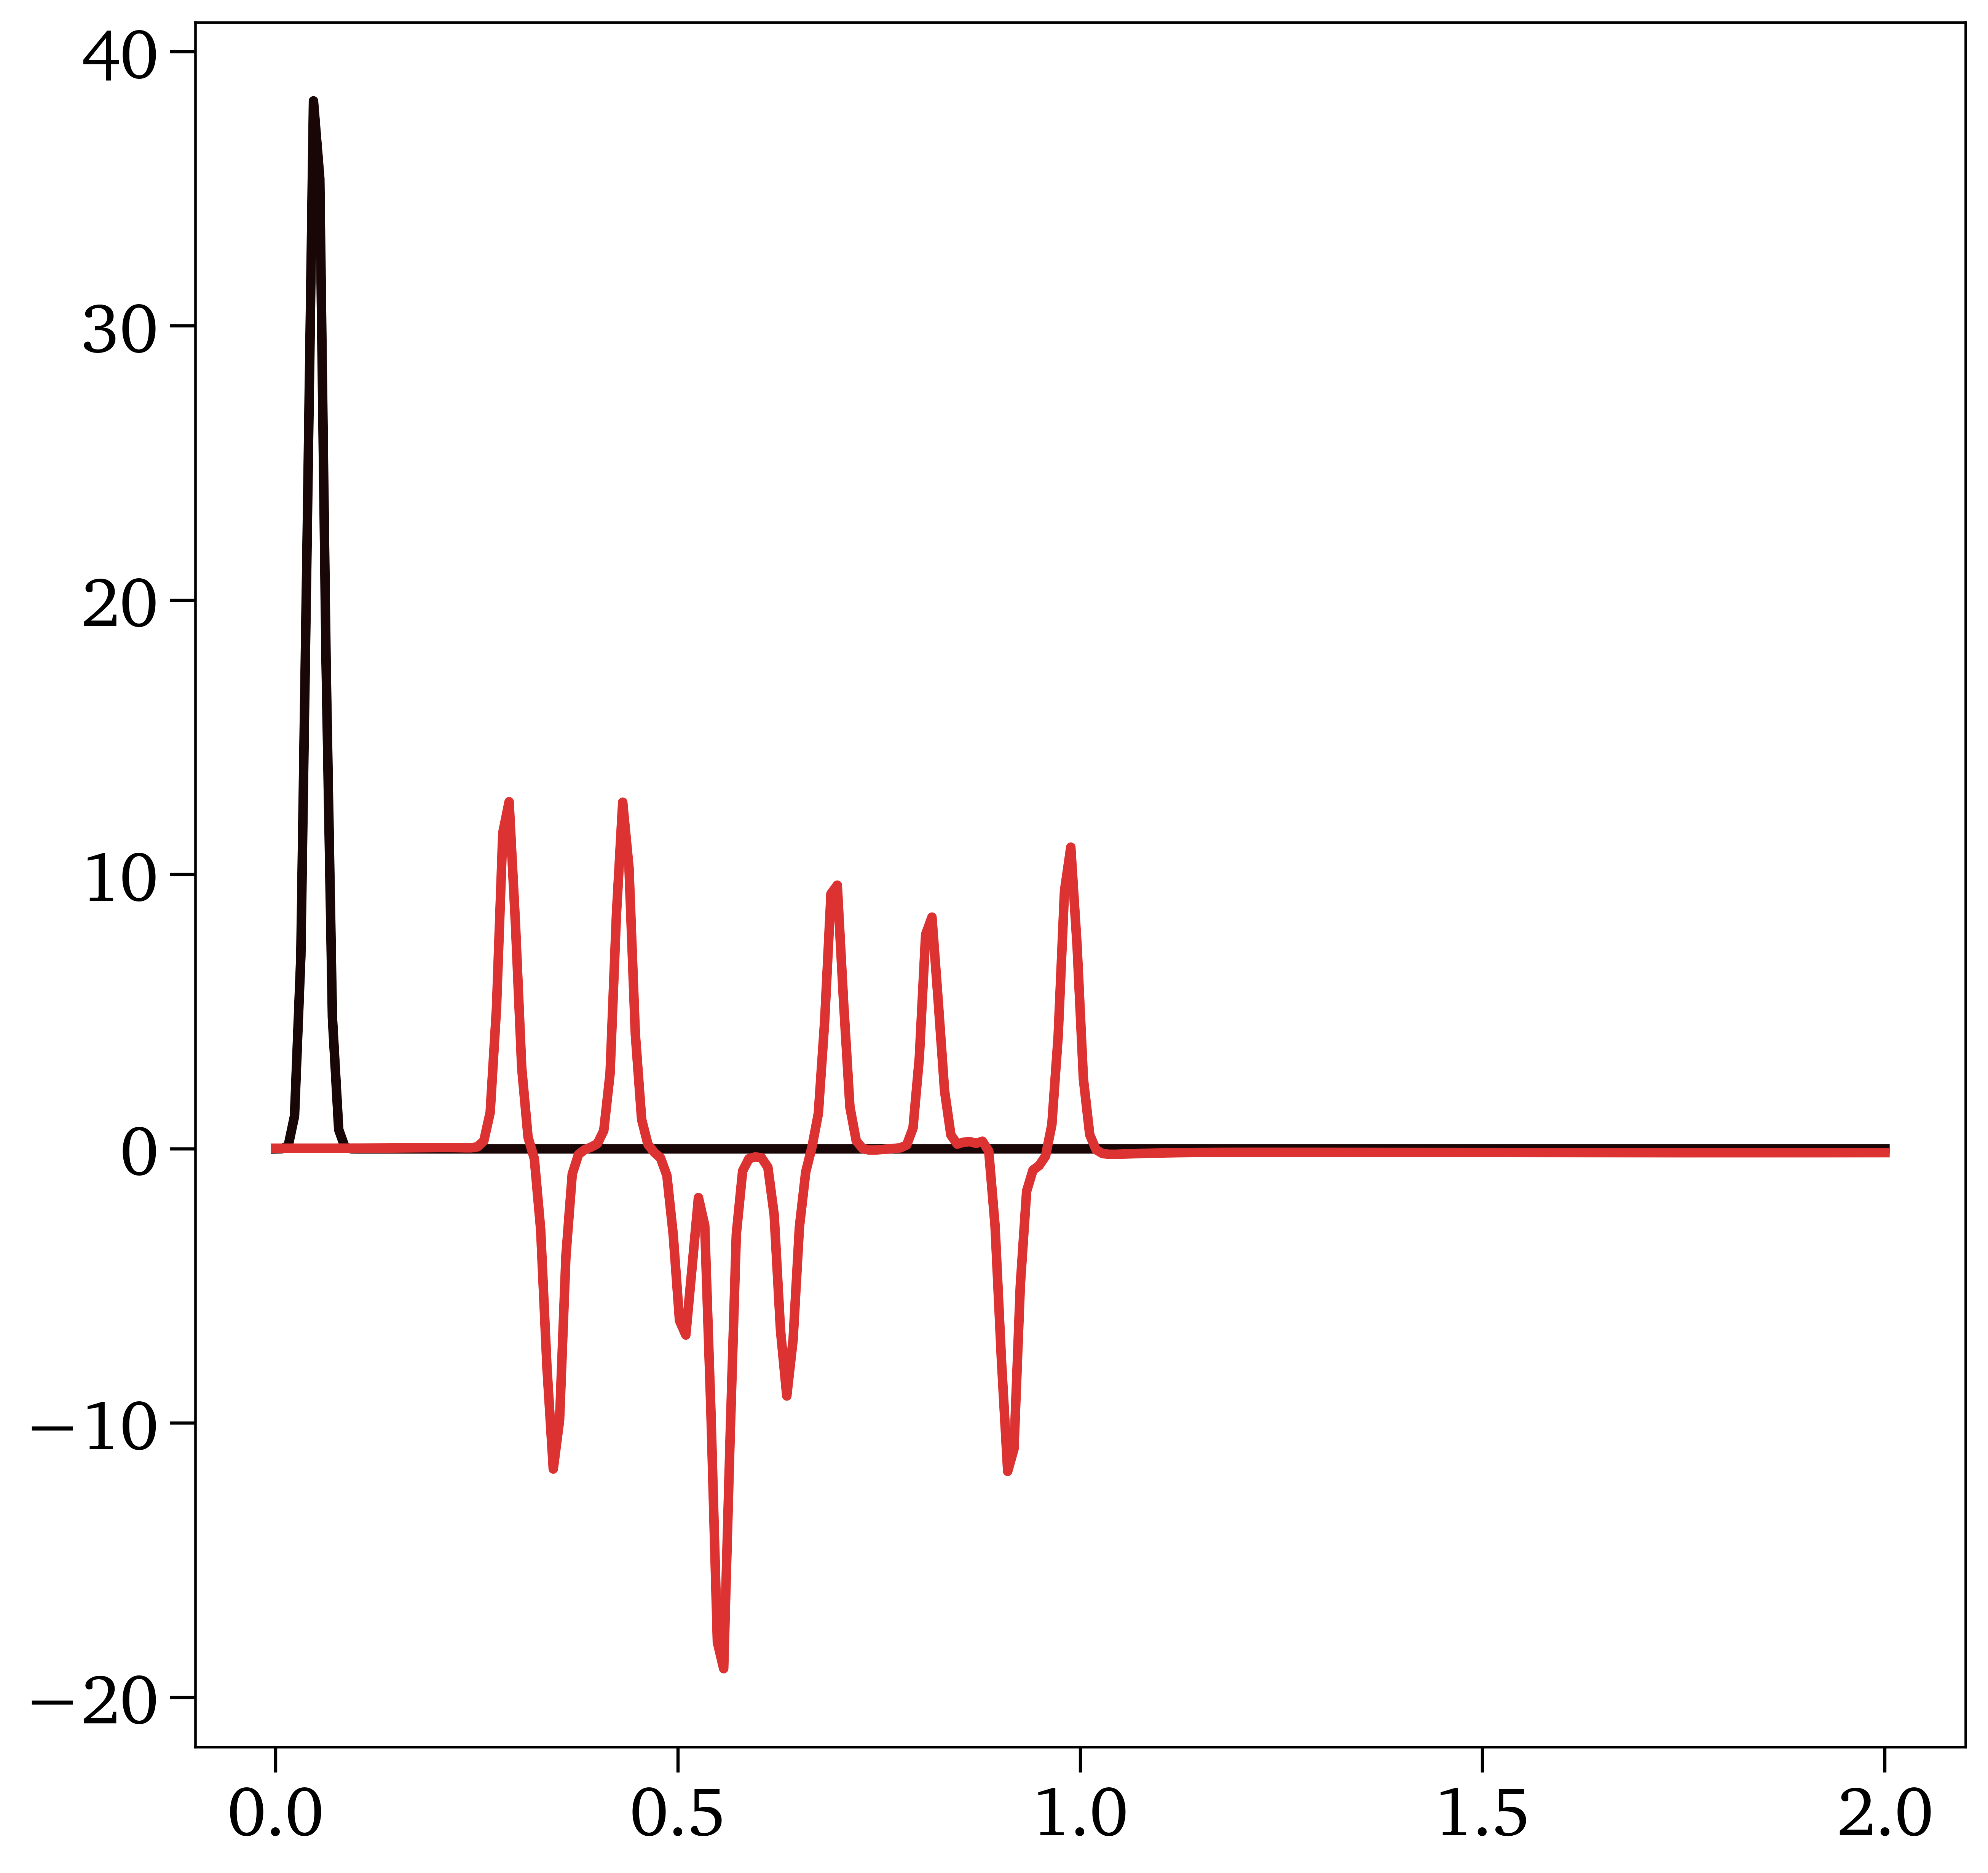

In [13]:
#plt.contourf(xVec__, tVec__, s_Data)
#plt.contourf(xVec__, tVec__, s_Pred)

plt.plot(xVec_, s_Data[0,:])
plt.plot(xVec_, s_Pred[0,:])

## Plotting Loss Histories

In [ ]:
Data = pd.read_csv(path_to_run_fld+'/Training/History.csv')

fig  = plt.figure(figsize=(12,8))
plt.plot(Data['tot_loss'],     label='Training')
plt.plot(Data['val_tot_loss'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Tot. Loss [MSE]')
plt.legend()
plt.yscale('log')

# fig  = plt.figure(figsize=(12,8))
# plt.plot(Data['res_loss'],     label='Training')
# plt.plot(Data['val_res_loss'], label='Validation')
# plt.xlabel('Epoch')
# plt.ylabel('Residual Loss [MSE]')
# plt.legend()
# plt.yscale('log')


fig  = plt.figure(figsize=(12,8))
plt.plot(Data['pts_loss'],     label='Training')
plt.plot(Data['val_pts_loss'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Data Loss [MSE]')
plt.legend()
plt.yscale('log')

# fig  = plt.figure(figsize=(12,8))
# plt.plot(Data['scs_loss'],     label='Training')
# plt.plot(Data['val_scs_loss'], label='Validation')
# plt.xlabel('Epoch')
# plt.ylabel('S.C.s Loss [MSE]')
# plt.legend()
# plt.yscale('log')

# fig  = plt.figure(figsize=(12,8))
# plt.plot(Data['ics_loss'],     label='Training')
# plt.plot(Data['val_ics_loss'], label='Validation')
# plt.xlabel('Epoch')


# plt.ylabel('I.C.s Loss [MSE]')
# plt.legend()
# plt.yscale('log')

## Evaluating Trunk's Outputs

In [ ]:
iTrunk           = 2
iTest            = 0


FileName         = DataDir + '/Orig/'+DataType+'/ext/y.csv.'+str(iTest+1)
Data             = pd.read_csv(FileName, header=0)[['t']+Vars]

fig = plt.figure()
plt.plot(Data['t'], Data[Vars[iTrunk]])
plt.xscale('log')
plt.xlabel('Time [s]')
plt.ylabel(r'$\eta_{'+str(iTrunk+1)+'}$')



iVarVec = range(0,8,1)

tVecTot = np.logspace(-14,4,1000)

output_trunk = model.net.system_of_components['DeepONet'].components['Trunk_'+str(iTrunk+1)].call(tVecTot[...,np.newaxis], model.net.layers_dict, None, training=False)

fig = plt.figure()

for iVar in iVarVec:

    plt.plot(tVecTot, output_trunk[:,iVar])

#plt.xlim([1.e-6, 1.e-2])
plt.xscale('log')
plt.xlabel('Time [s]')
plt.ylabel(r'$\psi_{'+str(iTrunk+1)+'_{i}}$')

## Evaluating Branches' Outputs

In [ ]:
# FileName     = DataDir + '/Orig/train/ext/SimIdxs.csv'
# Data         = pd.read_csv(FileName, header=0)
# SimIdxs      = Data.to_numpy(int)


# FileName     = DataDir + '/Orig/train/ext/ICs.csv'
# Data         = pd.read_csv(FileName)
# ICVecs       = Data.to_numpy()
# n_ics        = len(ICVecs)
n_ics         = 500

Cols   = []
NewFlg = True
for iC in range(n_ics):

    try:
        
        FileName         = DataDir + '/Orig/'+DataType+'/ext/y.csv.'+str(iC+1)
        Data             = pd.read_csv(FileName, header=0)[['t']+Vars]

        DataICTemp       = Data[Vars].iloc[0]

        if (NewFlg):
            DataIC           = DataICTemp
            NewFlg           = False
        else:
            DataIC           = pd.concat([DataIC, DataICTemp], axis=1)
            Cols.append(str(iC+1))
            
    except:
        pass

tVec              = Data['t']
DataIC            = DataIC.T.reset_index(drop=True, inplace=False)

DataIC.head()

DataBranch       = model.net.layers_dict['DeepONet']['Branch']['DeepONet-Branch_Normalization'](DataIC.to_numpy())

In [ ]:
iBranch = 0
iVar    = 5



output_branch = model.net.system_of_components['DeepONet'].components['Branch_'+str(iBranch+1)].call(DataIC.to_numpy(), model.net.layers_dict, None, training=False)



#%matplotlib qt

fig = plt.figure()
ax  = fig.add_subplot(projection='3d')
ax.scatter(DataIC['T'], DataIC['H2'], output_branch[:,iVar], c='r')
ax.set_xlabel(r'$T$')
ax.set_ylabel(r'$H_2$')
#ax.set_zlabel(r'$\alpha_{'+str(iBranch+1)+'_{'+str(iVar+1)+'}}$')
ax.set_zlabel(r'$\alpha_{'+str(iBranch+1)+'_D}$')

## Evaluating Rigid Block + Trunk's Outputs

In [ ]:
fig = plt.figure()
ax  = fig.add_subplot(projection='3d')


output_stretch = model.net.system_of_components['DeepONet'].components['Stretch'].call(DataBranch, model.net.layers_dict, None, training=False)
#output_ = np.log(1. + np.exp(output_))

for iTrunk in range(InputData.n_trunks):
    #ax.scatter(DataIC['PC_1'], DataIC['PC_2'], np.exp(output_[:,iBranch]))
    ax.scatter(DataIC['T'], DataIC['H2'], output_stretch[:,iTrunk], label=r'$j='+str(iBranch+1)+'$')
    
    #DF = pd.DataFrame(np.concatenate([DataIC['T'].to_numpy()[...,np.newaxis], DataIC['H2'].to_numpy()[...,np.newaxis], output_[:,iBranch][...,np.newaxis]], axis=1), columns=['T_0','H2_0',Vars[iBranch]])
    #DF.to_csv('/Users/sventur/Desktop/Shifts/'+Vars[iVar]+'.csv', index=False)

ax.set_xlabel('\n'+r'$T$', rotation = 0)
ax.set_ylabel(r'           $H_2$', rotation = 0)
ax.set_zlabel(r'         $\bar{t}_j$', rotation = 0)
ax.xaxis.set_rotate_label(False)
ax.yaxis.set_rotate_label(False)
ax.zaxis.set_rotate_label(False)

ax.legend()
#ax.set_zscale('log')

if (FigDir):
    plt.savefig(FigDir+'/0DReact_'+DataType+'_DeepONet_RigidOutput.eps', format='eps', bbox_inches='tight')

In [ ]:
# for iBranch in range(len(Vars)):

#     DF = pd.DataFrame(np.concatenate([DataIC['T'].to_numpy()[...,np.newaxis], DataIC['H2'].to_numpy()[...,np.newaxis], output_[:,iBranch][...,np.newaxis]], axis=1), columns=['T_0','H2_0',Vars[iBranch]])
#     DF.to_csv('/Users/sventur/Desktop/Shifts/'+Vars[iBranch]+'.csv', index=False)

In [ ]:
VarNames=['T',
 'H_{2}',
 'H',
 'O',
 'O_{2}',
 'OH',
 'H_{2}O',
 'HO_{2}',
 'H_{2}O_{2}',
 'N',
 'NH',
 'NH_{2}',
 'NH_{3}',
 'NNH',
 'NO',
 'NO_{2}',
 'N_{2}O',
 'HNO',
 'N_{2}']


fig = plt.figure()

for iBranch in [0]:
    plt.scatter(DataIC['T'], output_stretch[:,iBranch], label=r'$j='+VarNames[iBranch]+'$', s=30)
    
plt.xlabel(r'$T_0$')
plt.ylabel(r'$\bar{t}_j$')
#plt.yscale('log')
plt.xlim([1000,2000])
#plt.ylim([0,80])

plt.legend(fontsize=30)
#ax.set_zscale('log')

if (FigDir):
    plt.savefig(FigDir+'/0DReact_'+DataType+'_DeepONet_RigidOutput_2D.eps', format='eps', bbox_inches='tight')
    
## np.exp(np.log(1.e-6) - np.log(40))

In [ ]:
# fig = plt.figure(figsize=(10,10))
# ax  = fig.add_subplot(projection='3d')


# output_ = model.net.system_of_components['DeepONet'].components['Rigid'].call(DataIC.to_numpy(), training=False)

# output_.shape

# for iBranch in range(7,14):
#     #ax.scatter(DataIC['PC_1'], DataIC['PC_2'], np.exp(output_[:,iBranch]))
#     ax.scatter(DataIC['PC_1'], DataIC['PC_2'], output_[:,iBranch], label=r'$\eta_{'+str(iBranch+1)+'}$')


# ax.set_xlabel(r'$\eta_{'+str(1)+'_0}$')
# ax.set_ylabel(r'$\eta_{'+str(2)+'_0}$')
# ax.set_zlabel(r'$\log(\bar{t})$')
# ax.legend()
# #ax.set_zscale('log')

In [ ]:
iVarVec   = [18]

for iVar in iVarVec:
    
    iTrunk   = 0 #iVar

    NewFlg   = True
    fig, ax1 = plt.subplots()
    ax2      = ax1.twiny()  # instantiate a second axes that shares the same x-axis
    for iTest in CasesVec:
        
        FileName         = DataDir + '/Orig/'+DataType+'/ext/y.csv.'+str(iTest+1)
        Data             = pd.read_csv(FileName, header=0)[['t']+Vars]
        
        tVec             = np.maximum(Data['t'].to_numpy(), -1)#FixedMinVal)
        yPCA_Data        = Data[Vars].to_numpy()
        Data0            = Data[Data['t'] == 0.][Vars]
#         yPCA_Data        = ((y_Data[:,ToOrig_Mask] - C[:,0])/D[:,0]).dot(A.T)
#         yPre_Data        = yPCA_Data.dot(A)
#         yAnti_Data       = yPre_Data * D[:,0] + C[:,0]
#         Data0            = pd.DataFrame([yPCA_Data[1,:]], columns=Vars0)

        if NewFlg:
            Label1 = 'ODE'
            Label2 = 'Rigid Block Prepr.'
            NewFlg = False
        else:
            Label1 = None
            Label2 = None

    
        ax1.plot(tVec, yPCA_Data[:,iVar], color=ColorVec[0], label=Label1)
        
        ax2.plot(tVec*output_stretch[iTest,iTrunk], yPCA_Data[:,iVar], color=ColorVec[1], label=Label2)

    #plt.vlines(0., ymin=5., ymax=12., linestyles='dashed', color=ColorVec[1])
    
    color = ColorVec[0]
    ax1.set_xlabel(r'Time [s]', size=34)
    if (Vars[iVar] == 'T'):
        ax1.set_ylabel(r'Temperature [K]', color=color, size=34)
    else:
        ax1.set_ylabel(r'$'+VarNames[iVar]+'$, Mass Fraction', color=color, size=34)
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.set_xscale('log')

    color = ColorVec[1]
    ax2.set_xlabel(r'      $t/\bar{t}_{'+VarNames[iVar]+'}$ [s]', color=color, size=34, labelpad=10)  # we already handled the x-label with ax1
    #ax2.set_ylabel(r'$x$', color=color, size=34)
    ax2.tick_params(axis='x', labelcolor=color)
    ax2.set_xscale('log')

    fig.tight_layout()  # otherwise the right y-label is slightly clipped

    #plt.legend(loc=4)
    
    
    if (FigDir):
        plt.savefig(FigDir+'/0DReact_test_DeepONet_'+Vars[iVar]+'_Shift.eps', format='eps', bbox_inches='tight')

In [ ]:
### Experimenting

# n_clusters = 5

# from sklearn.cluster import KMeans
# X = output_.T
# kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(X)
# kmeans.labels_

# for i_cluster in range(n_clusters):
#     print('Cluster '+str(i_cluster+1)+': ', np.array(Vars)[kmeans.labels_==i_cluster])

In [ ]:
Weights = []
for iVar in range(InputData.n_outputs):
    Weights_ = model.net.system_of_components['DeepONet'].components['OutDecoder_'+str(iVar+1)].sub_components['Main'].layers_vec[0].weights[0].numpy()[:,0]
    Weights.append(Weights_)
    
Weights = np.stack(Weights, axis=0)

In [ ]:
from scipy.special import softmax

#Weights = softmax(Weights)
#Weights = Weights / np.sum(Weights, axis=1)[...,np.newaxis]

In [ ]:
Weights

In [ ]:
from sklearn.cluster import KMeans

NGroups = 3

kmeans  = KMeans(n_clusters=NGroups, random_state=0).fit(Weights)

In [ ]:
kmeans.labels_

In [ ]:
Vars

In [ ]:
fig = plt.figure()
ax  = fig.add_subplot(projection='3d')

for iVar in range(Weights.shape[0]): 
    ax.scatter(Weights[iVar,0], Weights[iVar,1], Weights[iVar,2], c=ColorVec[kmeans.labels_[iVar]]) 
    ax.text(Weights[iVar,0], Weights[iVar,1], Weights[iVar,2], Vars[iVar], size=15, zorder=1, color='k')

ax.set_xlabel(r'$\alpha_1$')
ax.set_ylabel(r'$\alpha_2$')
ax.set_zlabel(r'$\alpha_3$')
# ax.set_xlim([0.,1.])
# ax.set_ylim([0.,1.])
# ax.set_zlim([0.,1.])

In [ ]:
fig = plt.figure()

for iVar in range(Weights.shape[0]): 
    plt.scatter(Weights[iVar,1], Weights[iVar,2], c=ColorVec[kmeans.labels_[iVar]]) 
    plt.text(Weights[iVar,1], Weights[iVar,2],  Vars[iVar], size=15, zorder=1, color='k')

plt.xlabel(r'$\alpha_2$')
plt.ylabel(r'$\alpha_3$')
# ax.set_xlim([0.,1.])
# ax.set_ylim([0.,1.])
# ax.set_zlim([0.,1.])

In [ ]:
for iGroup in range(NGroups):

    iVarVec = np.where(kmeans.labels_ == iGroup)[0]

    fig, ax1 = plt.subplots()
    for iVar in iVarVec:

        NewFlg   = True
        for iTest in CasesVec:

            FileName         = DataDir + '/Orig/'+DataType+'/ext/y.csv.'+str(iTest+1)
            Data             = pd.read_csv(FileName, header=0)[['t']+Vars]

            tVec             = np.maximum(Data['t'].to_numpy(), -1)#FixedMinVal)
            yPCA_Data        = Data[Vars].to_numpy()
            Data0            = Data[Data['t'] == 0.][Vars]
    #         yPCA_Data        = ((y_Data[:,ToOrig_Mask] - C[:,0])/D[:,0]).dot(A.T)
    #         yPre_Data        = yPCA_Data.dot(A)
    #         yAnti_Data       = yPre_Data * D[:,0] + C[:,0]
    #         Data0            = pd.DataFrame([yPCA_Data[1,:]], columns=Vars0)

            if NewFlg:
                Label1 = 'ODE'
                Label2 = 'Rigid Block Prepr.'
                NewFlg = False
            else:
                Label1 = None
                Label2 = None


            ax1.plot(tVec, yPCA_Data[:,iVar], color=ColorVec[0], label=Label1)


        color = ColorVec[0]
        ax1.set_xlabel(r'Time [s]', size=34)
        if (Vars[iVar] == 'T'):
            ax1.set_ylabel(r'Temperature [K]', color=color, size=34)
        else:
            ax1.set_ylabel(r'$'+VarNames[iVar]+'$, Mass Fraction', color=color, size=34)
        ax1.tick_params(axis='y', labelcolor=color)
        ax1.set_xscale('log')


        fig.tight_layout()  # otherwise the right y-label is slightly clipped

        #plt.legend(loc=4)